# CSE 572: Lab 6

In this lab, you will practice implementing different variations of the Support Vector Machine (SVM) classifier.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.


Name - Swarali Chine

ASU ID - 1222583687

### Load the iris dataset

Load the dataset. For visualization purposes for the first exercise, we will convert the dataframe to have only two features (petal length and petal width) and two classes (Iris-virginica and Iris-other).

In [35]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
# Drop the sepal features 
data = data.drop(['sepal length', 'sepal width'], axis=1)

data.head()

petal length  petal width        class
0           1.4          0.2  Iris-setosa
1           1.4          0.2  Iris-setosa
2           1.3          0.2  Iris-setosa
3           1.5          0.2  Iris-setosa
4           1.4          0.2  Iris-setosa

In [ ]:
# Replace the Iris-setosa and Iris-versicolor classes with Iris-other
data['class'] = data['class'].replace('Iris-versicolor', 'Iris-other')
data['class'] = data['class'].replace('Iris-setosa', 'Iris-other')

Next, we will split our dataset into three subsets: training (60%), validation (20%), and test (20%).

In [5]:
import numpy as np

# The first parameter is the shuffled data frame
# The second parameter is the split indices which are at 60% of the data and 80% of the data
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

Print the number of samples in each of the three subsets and the number of instances from each class. For example, for the training set you might print "The training set has __ instances (__ virginica, __ other)".

In [6]:
# YOUR CODE HERE
print("The training Set: "+str(train.shape[0])+" samples")
print("The validation Set: "+str(val.shape[0])+" samples")
print("The test Set: "+str(test.shape[0])+" samples")

The training Set: 90 samples
The validation Set: 30 samples
The test Set: 30 samples


## Support vector machines
Support vector machines (SVMs) are a supervised learning method that finds the hyperplane (or set of hyperplanes) in the $n$-dimensional feature space (where $n$ is the number of input features) which maximizes the distance to the nearest training samples from each class. Maximizing this margin ensures that the decision boundary will be as generalizable as possible to new, unseen data points. 

In [7]:
# import the Support vector classifier
from sklearn.svm import SVC

The main hyperparameter to choose is the regularization parameter $C$, which represents the strength of the penalty incurred during training for allowing samples to be closer to the margin boundary (since a perfect decision boundary is not attainable for most problems). 

SVM also uses a kernel function $K$ to map samples to a higher dimensional space (this is referred to as the "kernel trick"). The SVM implementation in scikit-learn gives four options for the kernel function: linear (this is the standard SVM without non-linear kernel), polynomial, radial basis function (RBF), and sigmoid. 

The below example uses a linear kernel with $C=0.1$.

In [8]:
C = 0.1
linear_svc = SVC(kernel='linear', C=C)

In [9]:
# train the SVM classifier
linear_svc.fit(train[['petal length','petal width']], train['class'])

SVC(C=0.1, kernel='linear')

The following function for plotting the decision boundary is from the [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html).  The function plots the decision boundary as a gray solid line and the margins as gray dashed lines. The support vectors are circled.

In [10]:
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='gray');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Plot the dataset and the learned decision boundary.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


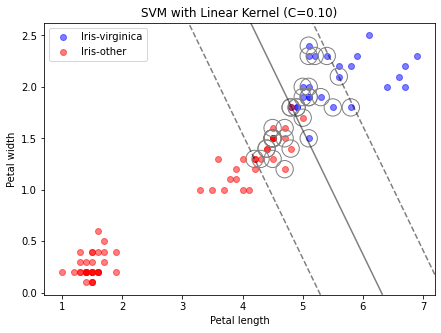

In [11]:
fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(linear_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Linear Kernel (C=%0.2f)' % C);

Train a new model with $C=100$ and plot the resulting decision boundary.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


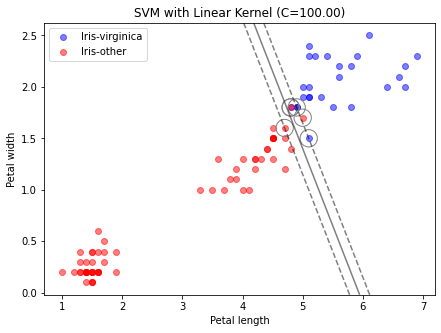

In [13]:
# YOUR CODE HERE
C = 100
linear_svc_1 = SVC(kernel='linear', C=C)
linear_svc_1.fit(train[['petal length','petal width']], train['class'])

fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(linear_svc_1, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Linear Kernel (C=%0.2f)' % C);



**Question 1:** 

How did a higher value of $C$ affect the decision boundary? Why?

**Answer:** 

YOUR ANSWER HERE : 

  1.Higher values of C lead to Overfitting resulting in a low bias and high variance. 
2. As we increase the value of C, the model gets Overfitted and there is less chance of misclassification. 
3. As the value of C increases, the distance between the decision vectors or the distance between the support vector decreases.
4. Hence, while optimizing the model the one with smaller-margin hyperplane is used to better classify the data.

Compute and print the accuracy of each classifier (with $C=0.1$ and $C=100$) on the validation set. 

In [16]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE
val_pred = linear_svc.predict(val[['petal length','petal width']])
val_pred_1 = linear_svc_1.predict(val[['petal length','petal width']])

print("Accuracy with C=0.1: ",accuracy_score(val['class'], val_pred))
print()
print("Accuracy with C=100: ",accuracy_score(val['class'], val_pred_1))

Accuracy with C=0.1:  0.9

Accuracy with C=100:  0.9666666666666667


**Question 2:** 

Which value of $C$ resulted in higher validation accuracy?

**Answer:** 

YOUR ANSWER HERE: C=100 resulted in higher validation accuracy.

In addition to linear SVM, we can also implement SVM with polynomial, radial basis function (RBF), and sigmoid kernels. Train an SVM classifier with each kernel separately. Set $C$ to be the value of $C$ with highest validation accuracy from Question 2. 

You may need to consult the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The polynomial kernel requires the `degree` parameter to be passed; use `degree=3`.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


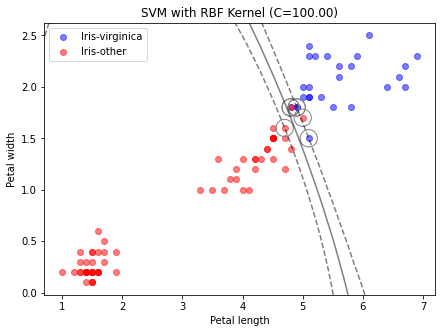

In [18]:
# RBF
# YOUR CODE HERE
C = 100
rbf_svc = SVC(kernel='rbf', C=C)
rbf_svc.fit(train[['petal length','petal width']], train['class'])

fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(rbf_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with RBF Kernel (C=%0.2f)' % C);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


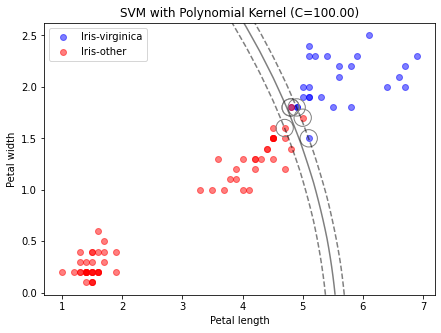

In [19]:
# Polynomial (degree=3)
# YOUR CODE HERE
C = 100
poly_svc = SVC(kernel='poly', degree=3, C=C)
poly_svc.fit(train[['petal length','petal width']], train['class'])

fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(poly_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Polynomial Kernel (C=%0.2f)' % C);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


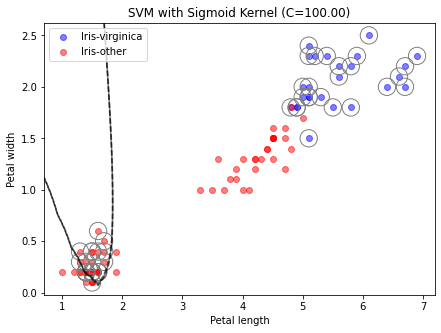

In [20]:
# Sigmoid
# YOUR CODE HERE
C = 100
sigmoid_svc = SVC(kernel='sigmoid', C=C)
sigmoid_svc.fit(train[['petal length','petal width']], train['class'])

fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(sigmoid_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Sigmoid Kernel (C=%0.2f)' % C);

Compute and print the validation accuracy for each of the 3 classifiers.

In [21]:
# YOUR CODE HERE
rbf_vali_pred = rbf_svc.predict(val[['petal length','petal width']])
poly_vali_pred = poly_svc.predict(val[['petal length','petal width']])
sigmoid_vali_pred = sigmoid_svc.predict(val[['petal length','petal width']])

print("Considering C = 100")
print("The RBF Kernel Accuracy: ",accuracy_score(val['class'], rbf_vali_pred))
print("The Polynomial Kernel Accuracy: ",accuracy_score(val['class'], poly_vali_pred))
print("The Sigmoid Kernel Accuracy: ",accuracy_score(val['class'], sigmoid_vali_pred))

Considering C = 100
The RBF Kernel Accuracy:  0.9666666666666667
The Polynomial Kernel Accuracy:  0.9666666666666667
The Sigmoid Kernel Accuracy:  0.43333333333333335


**Question 3:** 

Which of the four kernels (the three above + linear) gave the highest validation accuracy? (If multiple tied for the highest accuracy, list all of them.)

**Answer:** 

YOUR ANSWER HERE :
1. From the above calculated frequencies, we see that Linear, Polynomial (degree=3) and Sigmoid Kernel predicted the validation set with the highest accuracy of 96.67%.

### SVM with non-linear decision boundary

For the Iris-virginica vs. Iris-other version of the Iris dataset, the two classes were mostly linearly separable with a small number of classification errors. However, if we instead wanted to classify Iris-versicolor vs. Iris-other, the two classes would not be linearly separable. Below, we load the dataset again and convert it to Iris-versicolor vs. Iris-other and plot the dataset as a scatter plot.

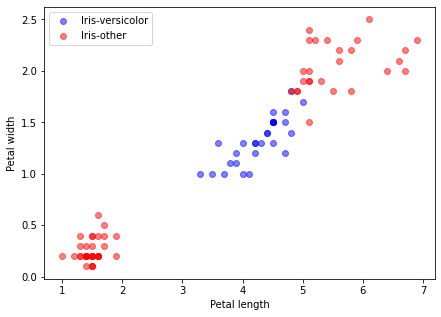

In [22]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

# Drop the sepal features
data = data.drop(['sepal length', 'sepal width'], axis=1)

# Replace the Iris-virginica and Iris-setosa classes with Iris-other
data['class'] = data['class'].replace('Iris-virginica', 'Iris-other')
data['class'] = data['class'].replace('Iris-setosa', 'Iris-other')

# Split the data into train/val/test
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

# Plot the dataset
fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the versicolor instances
ax.scatter(train[train['class'] == 'Iris-versicolor']['petal length'], 
               train[train['class'] == 'Iris-versicolor']['petal width'],
               label='Iris-versicolor',
               color='blue',
               alpha=0.5)

# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()

If we train a linear SVM to classify these instances, the accuracy will be low. Train a linear SVM and plot the decision boundary to show this (use $C=100$).

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


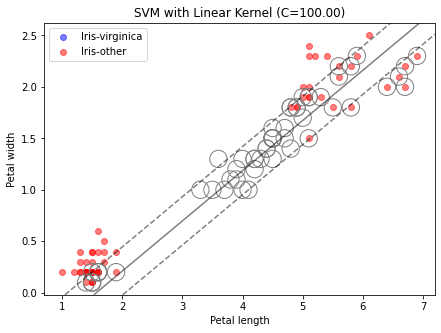

In [23]:
# YOUR CODE HERE
C = 100
linear_svc = SVC(kernel='linear', C=C)
linear_svc.fit(train[['petal length','petal width']], train['class'])

fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(linear_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Linear Kernel (C=%0.2f)' % C);

The radial basis function kernel will allow us to learn an elliptical decision boundary that will better fit the data. Train an SVM with RBF kernel and plot the decision boundary (use $C=100$).

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


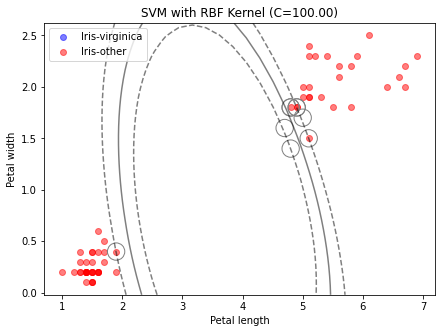

In [24]:
# YOUR CODE HERE
C = 100
rbf_svc = SVC(kernel='rbf', C=C)
rbf_svc.fit(train[['petal length','petal width']], train['class'])

fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(rbf_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with RBF Kernel (C=%0.2f)' % C);

Compute and print the validation accuracy of your linear and RBF SVM classifiers.

In [25]:
# YOUR CODE HERE
linear_vali_pred = linear_svc.predict(val[['petal length','petal width']])
rbf_vali_pred = rbf_svc.predict(val[['petal length','petal width']])

print("The validation accuracy for C = 100 is calculated below:")
print("The accuracy of Linear Kernel is: ",accuracy_score(val['class'], linear_vali_pred))
print("The accuracy of RBF Kernel: ",accuracy_score(val['class'], rbf_vali_pred))

The validation accuracy for C = 100 is calculated below:
The accuracy of Linear Kernel is:  0.7
The accuracy of RBF Kernel:  0.9666666666666667


Finally, use the best model (the one with the highest validation accuracy in the last cell) to compute the final accuracy on our test set. 

In [27]:
# YOUR CODE HERE
rbf_test_prediction = rbf_svc.predict(test[['petal length','petal width']])
print("The RBF Kernel Test Accuracy is: ",accuracy_score(test['class'], rbf_test_prediction))

The RBF Kernel Test Accuracy is:  0.9666666666666667


### Put everything together

In this last section, we load the full iris dataset including all features and the three classes and split it into train/val/test subsets. Then you will implement the following steps:
1. Train an SVM with RBF kernel using all four input features and all 3 classes.
2. Evaluate whether $C=0.1$, $C=1$, $C=10$, or $C=100$ gives better validation accuracy. Print the validation accuracy for both.
3. Use the model with the setting of $C$ that gave the highest validation accuracy to make predictions for the *test* set and compute/print the final accuracy on the test set.

In [28]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

# Split the data into train/val/test
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

In [30]:
# Train SVMs and evaluate validation accuracy
# YOUR CODE HERE
arr_for_C = [0.1, 1, 10, 100]
for C in arr_for_C:
  rbf_svc = SVC(kernel='rbf', C=C)
  rbf_svc.fit(train[['sepal length', 'sepal width', 'petal length', 'petal width']], train['class'])
  rbf_val_pred = rbf_svc.predict(val[['sepal length', 'sepal width', 'petal length', 'petal width']])
  print("The validation accuracy of the RBF Kernel with = "+str(C)+": ",accuracy_score(val['class'], rbf_val_pred))

The validation accuracy of the RBF Kernel with = 0.1:  0.7333333333333333
The validation accuracy of the RBF Kernel with = 1:  0.9333333333333333
The validation accuracy of the RBF Kernel with = 10:  0.9666666666666667
The validation accuracy of the RBF Kernel with = 100:  0.9333333333333333


In [34]:
# Use best model to predict test set and compute test accuracy
# YOUR CODE HERE
rbf_svc = SVC(kernel='rbf', C=10)
rbf_svc.fit(train[['sepal length', 'sepal width', 'petal length', 'petal width']], train['class'])
rbf_test_pred = rbf_svc.predict(test[['sepal length', 'sepal width', 'petal length', 'petal width']])
print("The Test Accuracy for RBF Kernel with C = 10 is: ",accuracy_score(test['class'], rbf_test_pred))


The Test Accuracy for RBF Kernel with C = 10 is:  0.9666666666666667
